In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import rpy2.robjects as robjects
import pandas.rpy.common as com
import pandas as pd
import numpy as np
from deday_dev.util import prob_to_code
%matplotlib inline
%load_ext rpy2.ipython
pd.set_option('display.precision', 3)

/Users/user/anaconda/lib/python2.7/site-packages/pandas/rpy/__init__.py:11: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  FutureWarning)


In [2]:
table_list = []
os.getcwd()

'/Users/user/Work/Sir2_figs'

               coef exp(coef) se(coef)     z Pr(>|z|)    
FoodV        -1.410     0.244    0.176 -8.01  1.1e-15 ***
GenoOO        2.174     8.795    0.181 12.03  < 2e-16 ***
FoodV:GenoOO -0.501     0.606    0.239 -2.09    0.036 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


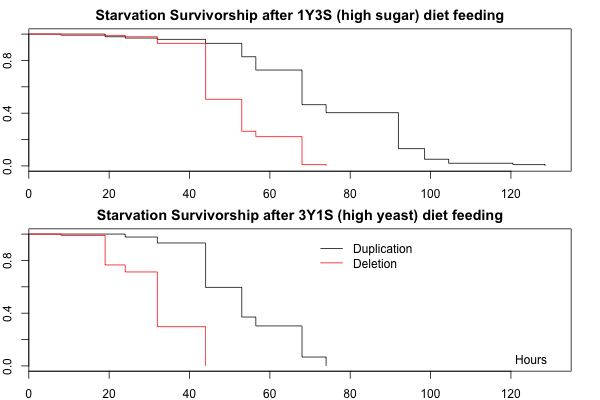

In [3]:
%%R -w 600 -h 400
library(survival)
setwd('/Users/user/Work/Sir2_figs')
df <- read.csv('Sir2_dup_del_stv.csv')
S1 <- survfit(Surv(time)~Food+Geno, conf.type="none", 
              data=df[(df$Food=='V')&((df$Geno=='22')|(df$Geno=='OO')),])
S2 <- survfit(Surv(time)~Food+Geno, conf.type="none",
              data=df[(df$Food=='IV')&((df$Geno=='22')|(df$Geno=='OO')),])
par(mfrow=c(2,1))
par(mar=c(2,2,2,2))
CLS <- c(1,2,3,4)
plot(S1, main="Starvation Survivorship after 1Y3S (high sugar) diet feeding", lty=1, lwd=1, col=CLS, xlim=c(0,135))
plot(S2, main="Starvation Survivorship after 3Y1S (high yeast) diet feeding", lty=1, lwd=1, col=CLS, xlim=c(0,135))
text(125, 0.05, 'Hours')
legend(70, 1., c('Duplication', 'Deletion'), 
       bty='n', lty=1, lwd=1, col=CLS)
mdl <- coxph(Surv(time)~Food*Geno, data=droplevels(df[((df$Geno=='22')|(df$Geno=='OO')),]))
S <- summary(mdl)
C <- printCoefmat(S$coefficient, digits=3)

In [4]:
temp_df = com.convert_robj((robjects.globalenv.get('S').rx2('coefficients')))
temp_df[' '] = map(prob_to_code, temp_df['Pr(>|z|)'])
table_list.append(temp_df.to_html())
temp_df

,coef,exp(coef),se(coef),z,Pr(>|z|),
FoodV,-1.41,0.24,0.18,-8.01,1.11e-15,***
GenoOO,2.17,8.80,0.18,12.03,0.00e+00,***
FoodV:GenoOO,-0.50,0.61,0.24,-2.09,3.64e-02,*


In [5]:
coeff_list = []

                           coef exp(coef) se(coef)      z Pr(>|z|)    
FoodIII                  0.3685    1.4455   0.0914   4.03  5.5e-05 ***
Genotype2O              -0.3826    0.6821   0.0913  -4.19  2.8e-05 ***
GenotypeO2              -0.1886    0.8281   0.0919  -2.05  0.04015 *  
GenotypeOO               0.1786    1.1955   0.0918   1.95  0.05170 .  
SexM                    -0.9641    0.3813   0.0924 -10.43  < 2e-16 ***
FoodIII:Genotype2O       0.0400    1.0408   0.1298   0.31  0.75796    
FoodIII:GenotypeO2      -0.0186    0.9815   0.1290  -0.14  0.88510    
FoodIII:GenotypeOO       1.9568    7.0768   0.1350  14.50  < 2e-16 ***
FoodIII:SexM             0.4695    1.5992   0.1297   3.62  0.00030 ***
Genotype2O:SexM         -0.5008    0.6060   0.1310  -3.82  0.00013 ***
GenotypeO2:SexM         -0.6915    0.5008   0.1311  -5.28  1.3e-07 ***
GenotypeOO:SexM          1.2109    3.3565   0.1301   9.31  < 2e-16 ***
FoodIII:Genotype2O:SexM  0.0231    1.0233   0.1842   0.13  0.90033    
FoodII

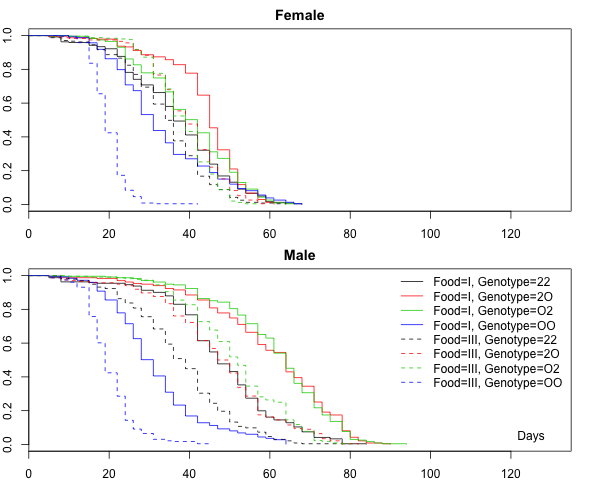

In [6]:
%%R -w 600 -h 480
library(survival)
setwd('/Users/user/Work/Sir2_figs')
df <- read.csv('Sir2_LS_Rep1.csv')
S1 <- survfit(Surv(time)~Food+Genotype, conf.type="none", data=df[df$Sex=='F',])
S2 <- survfit(Surv(time)~Food+Genotype, conf.type="none", data=df[df$Sex=='M',])
par(mfrow=c(2,1))
par(mar=c(2,2,2,2))
CLS <- c(1,2,3,4)
LTY <- rep(c(1,2), each=4)
plot(S1, main="Female", lty=LTY, lwd=1, col=CLS, xlim=c(0,135))
plot(S2, main="Male", lty=LTY, lwd=1, col=CLS, xlim=c(0,135))
text(125, 0.05, 'Days')
legend(90, 1.05, names(S1$strata), 
       bty='n', 
       lty=LTY, lwd=1, col=CLS)
mdl <- coxph(Surv(time)~Food*Genotype*Sex, data=df)
S <- summary(mdl)
C <- printCoefmat(S$coefficient, digits=3)

In [7]:
coeff_list.append(com.convert_robj(robjects.globalenv.get('S').rx2('coefficients')))

                             coef exp(coef) se(coef)      z Pr(>|z|)    
FoodIII                   0.88630   2.42613  0.12061   7.35  2.0e-13 ***
GenotypeC31               0.55482   1.74163  0.11284   4.92  8.8e-07 ***
GenotypeDel               0.49878   1.64671  0.11298   4.41  1.0e-05 ***
GenotypeDup               1.62255   5.06601  0.11558  14.04  < 2e-16 ***
SexM                     -1.36866   0.25445  0.12176 -11.24  < 2e-16 ***
FoodIII:GenotypeC31      -0.19463   0.82314  0.16036  -1.21    0.225    
FoodIII:GenotypeDel      -0.34035   0.71152  0.16023  -2.12    0.034 *  
FoodIII:GenotypeDup      -1.09712   0.33383  0.16203  -6.77  1.3e-11 ***
FoodIII:SexM             -0.00324   0.99677  0.16949  -0.02    0.985    
GenotypeC31:SexM         -0.35317   0.70246  0.16016  -2.21    0.027 *  
GenotypeDel:SexM         -0.33186   0.71759  0.15931  -2.08    0.037 *  
GenotypeDup:SexM         -1.06961   0.34314  0.16298  -6.56  5.3e-11 ***
FoodIII:GenotypeC31:SexM -0.13514   0.87359  0.2261

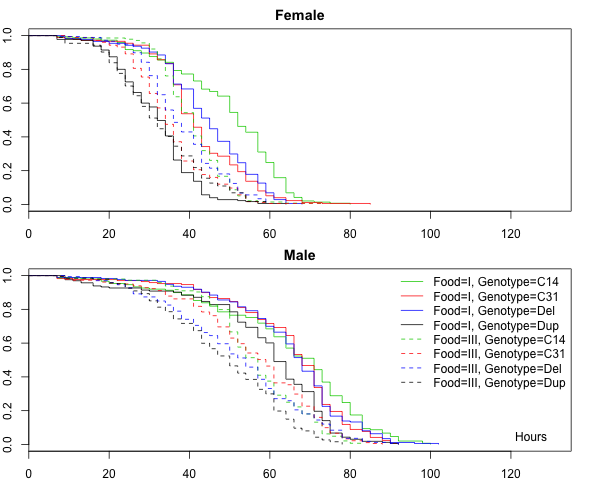

In [8]:
%%R -w 600 -h 480
library(survival)
setwd('/Users/user/Work/Sir2_figs')
df <- read.csv('Sir2_LS_Rep2.csv')
S1 <- survfit(Surv(time)~Food+Genotype, conf.type="none", data=df[df$Sex=='F',])
S2 <- survfit(Surv(time)~Food+Genotype, conf.type="none", data=df[df$Sex=='M',])
par(mfrow=c(2,1))
par(mar=c(2,2,2,2))
CLS <- c(3,2,4,1)
LTY <- rep(c(1,2), each=4)
plot(S1, main="Female", lty=LTY, lwd=1, col=CLS, xlim=c(0,135))
plot(S2, main="Male", lty=LTY, lwd=1, col=CLS, xlim=c(0,135))
text(125, 0.05, 'Hours')
legend(90, 1.05, names(S1$strata), 
       bty='n', lty=LTY, lwd=1, col=CLS)
mdl <- coxph(Surv(time)~Food*Genotype*Sex, data=df)
S <- summary(mdl)
C <- printCoefmat(S$coefficient, digits=3)

In [9]:
coeff_list.append(com.convert_robj(robjects.globalenv.get('S').rx2('coefficients')))

                           coef exp(coef) se(coef)      z Pr(>|z|)    
FoodIII                  0.2313    1.2602   0.0900   2.57  0.01017 *  
Genotype2O              -0.4994    0.6069   0.0925  -5.40  6.8e-08 ***
GenotypeO2              -0.7275    0.4831   0.0930  -7.82  5.3e-15 ***
GenotypeOO               2.1476    8.5647   0.0986  21.78  < 2e-16 ***
SexM                    -1.3592    0.2569   0.0943 -14.41  < 2e-16 ***
FoodIII:Genotype2O       0.4443    1.5594   0.1286   3.46  0.00055 ***
FoodIII:GenotypeO2       0.5538    1.7398   0.1292   4.29  1.8e-05 ***
FoodIII:GenotypeOO      -0.1611    0.8512   0.1318  -1.22  0.22167    
FoodIII:SexM             0.2899    1.3362   0.1297   2.23  0.02544 *  
Genotype2O:SexM          0.1571    1.1701   0.1326   1.18  0.23608    
GenotypeO2:SexM          0.4004    1.4924   0.1311   3.06  0.00225 ** 
GenotypeOO:SexM          1.3530    3.8689   0.1338  10.12  < 2e-16 ***
FoodIII:Genotype2O:SexM  0.0914    1.0957   0.1853   0.49  0.62193    
FoodII

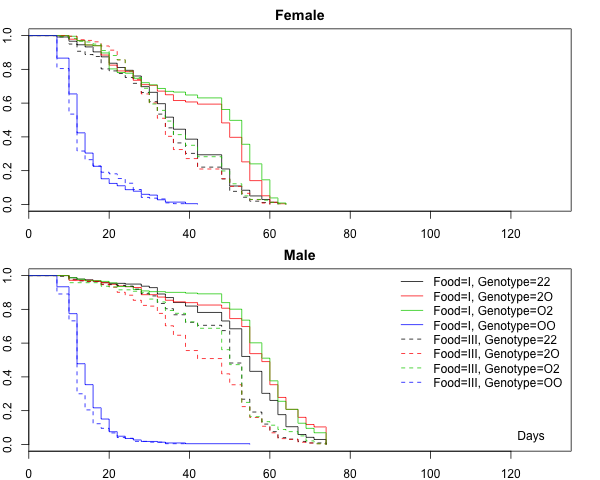

In [10]:
%%R -w 600 -h 480
library(survival)
setwd('/Users/user/Work/Sir2_figs')
df <- read.csv('Sir2_LS_Rep3_deldup.csv')
S1 <- survfit(Surv(time)~Food+Genotype, conf.type="none", data=df[df$Sex=='F',])
S2 <- survfit(Surv(time)~Food+Genotype, conf.type="none", data=df[df$Sex=='M',])
par(mfrow=c(2,1))
par(mar=c(2,2,2,2))
CLS <- c(1,2,3,4)
LTY <- rep(c(1,2), each=4)
plot(S1, main="Female", lty=LTY, lwd=1, col=CLS, xlim=c(0,135))
plot(S2, main="Male", lty=LTY, lwd=1, col=CLS, xlim=c(0,135))
text(125, 0.05, 'Days')
legend(90, 1.05, names(S1$strata), 
       bty='n', 
       lty=LTY, lwd=1, col=CLS)
mdl <- coxph(Surv(time)~Food*Genotype*Sex, data=df)
S <- summary(mdl)
C <- printCoefmat(S$coefficient, digits=3)

In [11]:
coeff_list.append(com.convert_robj(robjects.globalenv.get('S').rx2('coefficients')))

                             coef exp(coef) se(coef)      z Pr(>|z|)    
FoodIII                   0.05866   1.06041  0.09356   0.63   0.5307    
GenotypeC31              -0.24239   0.78475  0.09445  -2.57   0.0103 *  
GenotypeDel               0.07293   1.07565  0.09307   0.78   0.4333    
GenotypeDup               0.83033   2.29407  0.09345   8.89  < 2e-16 ***
SexM                     -1.49047   0.22527  0.09828 -15.17  < 2e-16 ***
FoodIII:GenotypeC31      -0.00578   0.99424  0.13160  -0.04   0.9650    
FoodIII:GenotypeDel       0.82635   2.28496  0.13132   6.29  3.1e-10 ***
FoodIII:GenotypeDup      -0.39779   0.67180  0.13070  -3.04   0.0023 ** 
FoodIII:SexM              0.93066   2.53619  0.13423   6.93  4.1e-12 ***
GenotypeC31:SexM          0.36574   1.44159  0.13517   2.71   0.0068 ** 
GenotypeDel:SexM         -0.14182   0.86778  0.13445  -1.05   0.2915    
GenotypeDup:SexM         -0.82422   0.43858  0.13398  -6.15  7.7e-10 ***
FoodIII:GenotypeC31:SexM -0.49433   0.60998  0.1895

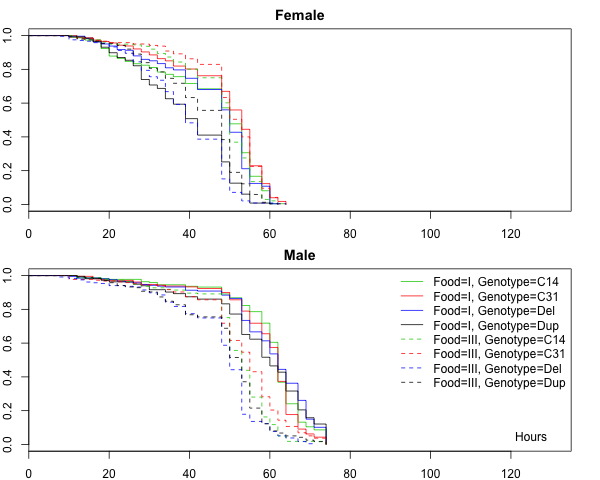

In [12]:
%%R -w 600 -h 480
library(survival)
setwd('/Users/user/Work/Sir2_figs')
df <- read.csv('Sir2_LS_Rep3_overw1118.csv')
S1 <- survfit(Surv(time)~Food+Genotype, conf.type="none", data=df[df$Sex=='F',])
S2 <- survfit(Surv(time)~Food+Genotype, conf.type="none", data=df[df$Sex=='M',])
par(mfrow=c(2,1))
par(mar=c(2,2,2,2))
CLS <- c(3,2,4,1)
LTY <- rep(c(1,2), each=4)
plot(S1, main="Female", lty=LTY, lwd=1, col=CLS, xlim=c(0,135))
plot(S2, main="Male", lty=LTY, lwd=1, col=CLS, xlim=c(0,135))
text(125, 0.05, 'Hours')
legend(90, 1.05, names(S1$strata), 
       bty='n', lty=LTY, lwd=1, col=CLS)
mdl <- coxph(Surv(time)~Food*Genotype*Sex, data=df)
S <- summary(mdl)
C <- printCoefmat(S$coefficient, digits=3)

In [13]:
coeff_list.append(com.convert_robj(robjects.globalenv.get('S').rx2('coefficients')))

In [14]:
Del_dup_coxph = pd.concat((coeff_list[0], coeff_list[2]), 
                          keys = ['Replicate1', 'Replicate2'], axis=1)
Del_dup_coxph['Both_sig'] = np.where(((Del_dup_coxph.iloc[:, [4,9]] < 0.1).all(1) & 
                                      ((np.sign(Del_dup_coxph.iloc[:, [0,5]])).sum(1)!=0)), '*', '')
Del_dup_coxph

Replicate1                                      \
                              coef exp(coef) se(coef)      z  Pr(>|z|)   
FoodIII                       0.37      1.45     0.09   4.03  5.54e-05   
Genotype2O                   -0.38      0.68     0.09  -4.19  2.79e-05   
GenotypeO2                   -0.19      0.83     0.09  -2.05  4.02e-02   
GenotypeOO                    0.18      1.20     0.09   1.95  5.17e-02   
SexM                         -0.96      0.38     0.09 -10.43  0.00e+00   
FoodIII:Genotype2O            0.04      1.04     0.13   0.31  7.58e-01   
FoodIII:GenotypeO2           -0.02      0.98     0.13  -0.14  8.85e-01   
FoodIII:GenotypeOO            1.96      7.08     0.13  14.50  0.00e+00   
FoodIII:SexM                  0.47      1.60     0.13   3.62  2.96e-04   
Genotype2O:SexM              -0.50      0.61     0.13  -3.82  1.31e-04   
GenotypeO2:SexM              -0.69      0.50     0.13  -5.28  1.32e-07   
GenotypeOO:SexM               1.21      3.36     0.13   9.31  0.00e+00   
FoodIII:Genotype2O:SexM       0.02      1.02     0.18   0.13  9.00e-01   
FoodIII:GenotypeO2:SexM      -0.06      0.94     0.18  -0.31  7.58e-01   
FoodIII:GenotypeOO:SexM      -0.98      0.38     0.18  -5.31  1.09e-07   

                        Replicate2                                      \
                              coef exp(coef) se(coef)      z  Pr(>|z|)   
FoodIII                       0.23      1.26     0.09   2.57  1.02e-02   
Genotype2O                   -0.50      0.61     0.09  -5.40  6.75e-08   
GenotypeO2                   -0.73      0.48     0.09  -7.82  5.33e-15   
GenotypeOO                    2.15      8.56     0.10  21.78  0.00e+00   
SexM                         -1.36      0.26     0.09 -14.41  0.00e+00   
FoodIII:Genotype2O            0.44      1.56     0.13   3.46  5.50e-04   
FoodIII:GenotypeO2            0.55      1.74     0.13   4.29  1.81e-05   
FoodIII:GenotypeOO           -0.16      0.85     0.13  -1.22  2.22e-01   
FoodIII:SexM                  0.29      1.34     0.13   2.23  2.54e-02   
Genotype2O:SexM               0.16      1.17     0.13   1.18  2.36e-01   
GenotypeO2:SexM               0.40      1.49     0.13   3.06  2.25e-03   
GenotypeOO:SexM               1.35      3.87     0.13  10.12  0.00e+00   
FoodIII:Genotype2O:SexM       0.09      1.10     0.19   0.49  6.22e-01   
FoodIII:GenotypeO2:SexM      -0.29      0.75     0.18  -1.58  1.13e-01   
FoodIII:GenotypeOO:SexM      -0.06      0.94     0.19  -0.34  7.32e-01   

                        Both_sig  
                                  
FoodIII                        *  
Genotype2O                     *  
GenotypeO2                     *  
GenotypeOO                     *  
SexM                           *  
FoodIII:Genotype2O                
FoodIII:GenotypeO2                
FoodIII:GenotypeOO                
FoodIII:SexM                   *  
Genotype2O:SexM                   
GenotypeO2:SexM                   
GenotypeOO:SexM                *  
FoodIII:Genotype2O:SexM           
FoodIII:GenotypeO2:SexM           
FoodIII:GenotypeOO:SexM

In [15]:
Over_w1118_coxph = pd.concat((coeff_list[1], coeff_list[3]), 
                             keys = ['Replicate1', 'Replicate2'], axis=1)
Over_w1118_coxph['Both_sig'] = np.where(((Over_w1118_coxph.iloc[:, [4,9]] < 0.1).all(1) & 
                                         ((np.sign(Over_w1118_coxph.iloc[:, [0,5]])).sum(1)!=0)), '*', '')
Over_w1118_coxph

Replicate1                                      \
                               coef exp(coef) se(coef)      z  Pr(>|z|)   
FoodIII                    8.86e-01      2.43     0.12   7.35  2.01e-13   
GenotypeC31                5.55e-01      1.74     0.11   4.92  8.80e-07   
GenotypeDel                4.99e-01      1.65     0.11   4.41  1.01e-05   
GenotypeDup                1.62e+00      5.07     0.12  14.04  0.00e+00   
SexM                      -1.37e+00      0.25     0.12 -11.24  0.00e+00   
FoodIII:GenotypeC31       -1.95e-01      0.82     0.16  -1.21  2.25e-01   
FoodIII:GenotypeDel       -3.40e-01      0.71     0.16  -2.12  3.37e-02   
FoodIII:GenotypeDup       -1.10e+00      0.33     0.16  -6.77  1.28e-11   
FoodIII:SexM              -3.24e-03      1.00     0.17  -0.02  9.85e-01   
GenotypeC31:SexM          -3.53e-01      0.70     0.16  -2.21  2.74e-02   
GenotypeDel:SexM          -3.32e-01      0.72     0.16  -2.08  3.72e-02   
GenotypeDup:SexM          -1.07e+00      0.34     0.16  -6.56  5.28e-11   
FoodIII:GenotypeC31:SexM  -1.35e-01      0.87     0.23  -0.60  5.50e-01   
FoodIII:GenotypeDel:SexM   1.51e-01      1.16     0.23   0.67  5.05e-01   
FoodIII:GenotypeDup:SexM   9.59e-01      2.61     0.23   4.22  2.50e-05   

                         Replicate2                                      \
                               coef exp(coef) se(coef)      z  Pr(>|z|)   
FoodIII                    5.87e-02      1.06     0.09   0.63  5.31e-01   
GenotypeC31               -2.42e-01      0.78     0.09  -2.57  1.03e-02   
GenotypeDel                7.29e-02      1.08     0.09   0.78  4.33e-01   
GenotypeDup                8.30e-01      2.29     0.09   8.89  0.00e+00   
SexM                      -1.49e+00      0.23     0.10 -15.17  0.00e+00   
FoodIII:GenotypeC31       -5.78e-03      0.99     0.13  -0.04  9.65e-01   
FoodIII:GenotypeDel        8.26e-01      2.28     0.13   6.29  3.12e-10   
FoodIII:GenotypeDup       -3.98e-01      0.67     0.13  -3.04  2.34e-03   
FoodIII:SexM               9.31e-01      2.54     0.13   6.93  4.11e-12   
GenotypeC31:SexM           3.66e-01      1.44     0.14   2.71  6.81e-03   
GenotypeDel:SexM          -1.42e-01      0.87     0.13  -1.05  2.92e-01   
GenotypeDup:SexM          -8.24e-01      0.44     0.13  -6.15  7.67e-10   
FoodIII:GenotypeC31:SexM  -4.94e-01      0.61     0.19  -2.61  9.13e-03   
FoodIII:GenotypeDel:SexM  -4.22e-01      0.66     0.19  -2.24  2.48e-02   
FoodIII:GenotypeDup:SexM   4.53e-01      1.57     0.19   2.42  1.56e-02   

                         Both_sig  
                                   
FoodIII                            
GenotypeC31                        
GenotypeDel                        
GenotypeDup                     *  
SexM                            *  
FoodIII:GenotypeC31                
FoodIII:GenotypeDel                
FoodIII:GenotypeDup             *  
FoodIII:SexM                       
GenotypeC31:SexM                   
GenotypeDel:SexM                   
GenotypeDup:SexM                *  
FoodIII:GenotypeC31:SexM           
FoodIII:GenotypeDel:SexM           
FoodIII:GenotypeDup:SexM        *

In [16]:
table_list.append(Del_dup_coxph.to_html())
table_list.append(Over_w1118_coxph.to_html())

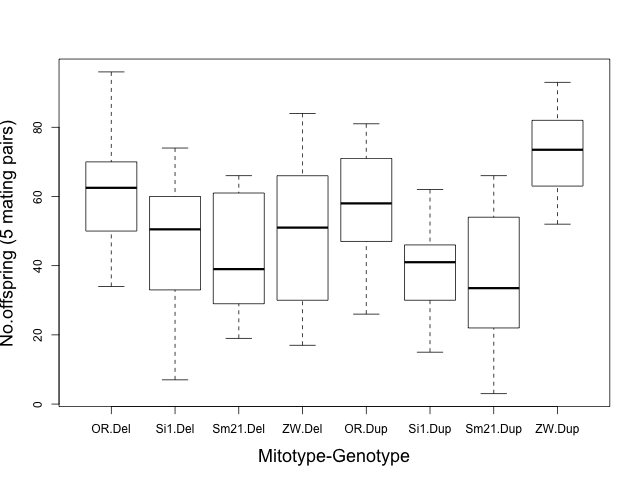

In [17]:
%%R -w 640 -h 480
library(survival)
setwd('/Users/user/Work/Sir2_figs')
df   <- read.csv('Sir2_dup_del_eclosion_mito.csv')
lm1  <- lm(Counts~(Mito*Geno*Sex) %in% Block + Block, data=df)
aov1 <- summary(aov(lm1))
boxplot(Counts~Mito*Geno, data=df, ylab='No.offspring (5 mating pairs)', xlab='Mitotype-Genotype', 
        cex.lab=1.5, cex.axis=1)

In [18]:
temp_df = com.convert_robj(robjects.globalenv.get('aov1')[0])
temp_df[' '] = map(prob_to_code, temp_df['Pr(>F)'])
table_list.append(temp_df.to_html())
temp_df

,Df,Sum Sq,Mean Sq,F value,Pr(>F),
Block,2,14910.29,7455.15,47.13,5.49e-15,***
Mito:Block,9,17682.21,1964.69,12.42,7.50e-13,***
Geno:Block,3,794.54,264.85,1.67,1.78e-01,
Sex:Block,3,184.79,61.60,0.39,7.61e-01,
Mito:Geno:Block,9,9252.96,1028.11,6.50,3.50e-07,***
Mito:Sex:Block,9,567.04,63.00,0.40,9.33e-01,
Geno:Sex:Block,3,84.71,28.24,0.18,9.11e-01,
Mito:Geno:Sex:Block,9,768.46,85.38,0.54,8.42e-01,
Residuals,96,15184.00,158.17,NaN,NaN,


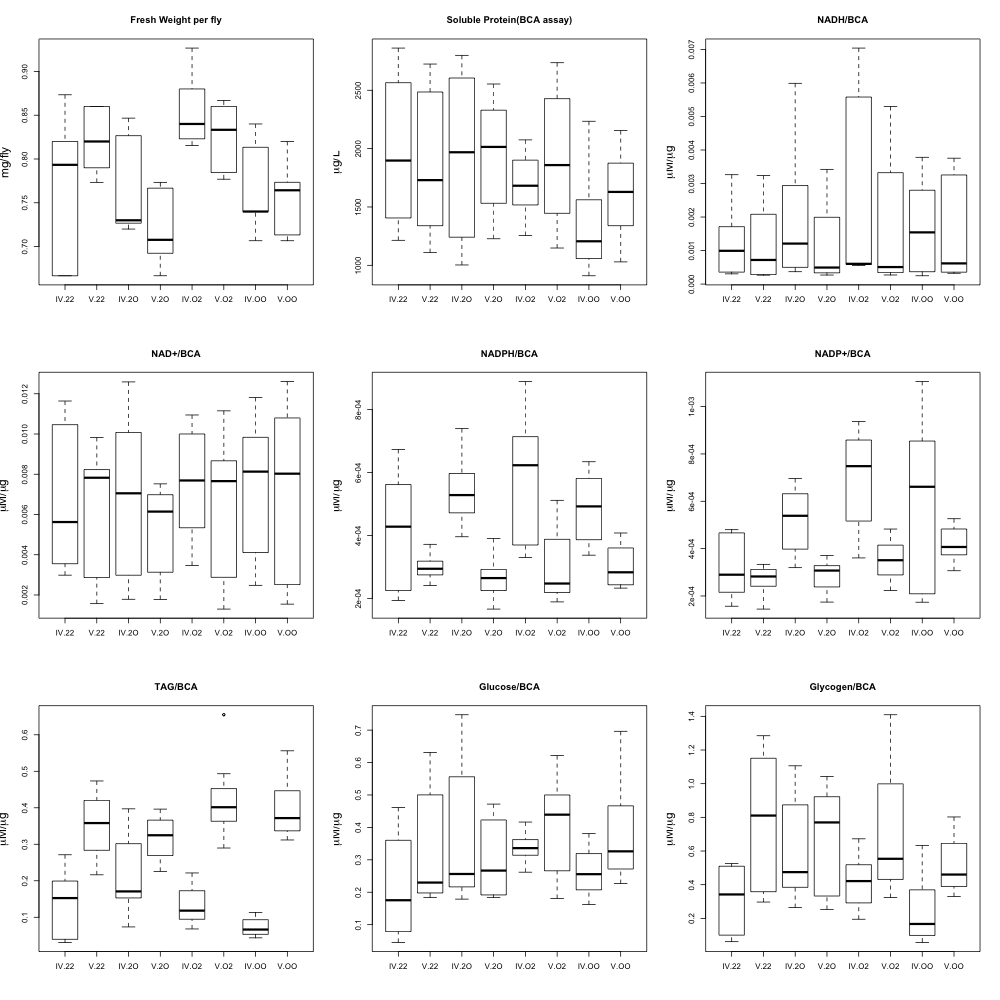

In [19]:
%%R -w 1000 -h 1000
setwd('/Users/user/Work/Sir2_figs')
df   <- read.csv('Sir2_dup_del_Biochem_VIV.CSV')
par(mfrow=c(3,3))
umug=expression(paste(mu, 'M/', mu, 'g'))
boxplot(fly_per~food*genotype, data=df, main='Fresh Weight per fly', ylab='mg/fly', cex.lab=1.5)
boxplot(BCA~food*genotype, data=df, main='Soluble Protein(BCA assay)', ylab=expression(paste(mu, 'g/L')), cex.lab=1.5)
boxplot(NADH_BCA~food*genotype, data=df, main='NADH/BCA', ylab=umug, cex.lab=1.5)
boxplot(NAD_BCA~food*genotype, data=df, main='NAD+/BCA', ylab=umug, cex.lab=1.5)
boxplot(NADPH_BCA~food*genotype, data=df, main='NADPH/BCA', ylab=umug, cex.lab=1.5)
boxplot(NADP_BCA~food*genotype, data=df, main='NADP+/BCA', ylab=umug, cex.lab=1.5)
boxplot(TAG_BCA~food*genotype, data=df, main='TAG/BCA', ylab=umug, cex.lab=1.5)
boxplot(Glc_BCA~food*genotype, data=df, main='Glucose/BCA', ylab=umug, cex.lab=1.5)
boxplot(Gly_BCA~food*genotype, data=df, main='Glycogen/BCA', ylab=umug, cex.lab=1.5)


In [20]:
%%R
setwd('/Users/user/Work/Sir2_figs')
df   <- read.csv('Sir2_dup_del_Biochem_VIV.CSV')

bc_model <- function(word){
  f = as.formula(paste(word, '~ (food*genotype) %in% Block + Block'))
  a = aov(f, data=df)
  return(summary(a))
}

result = lapply(list('fly_per', 'BCA', 'NADH_BCA', 'NAD_BCA', 'NADPH_BCA', 
                     'NADP_BCA', 'TAG_BCA', 'Glc_BCA', 'Gly_BCA'), bc_model)

In [21]:
aov_obj = [item[0] for item in robjects.globalenv.get('result')]
aov_obj = map(com.convert_robj, aov_obj)
for item in aov_obj:
    item[' '] = map(prob_to_code, item['Pr(>F)'])

In [22]:
BC_aov = pd.concat(aov_obj, keys=('Fresh Weight', 'Soluble Protein', 'NADH/BCA', 'NAD+/BCA', 'NADPH/BCA', 
                     'NADP+/BCA', 'TAG/BCA', 'Glucose/BCA', 'Glycogen/BCA'))
table_list.append(BC_aov.to_html())
BC_aov

Df    Sum Sq   Mean Sq  F value  \
Fresh Weight    Block                 1  1.16e-01  1.16e-01    84.58   
                food:Block            1  7.25e-04  7.25e-04     0.53   
                genotype:Block        3  1.24e-01  4.15e-02    30.36   
                food:genotype:Block   3  2.38e-02  7.94e-03     5.81   
                Residuals            87  1.19e-01  1.37e-03      NaN   
Soluble Protein Block                 1  1.59e+07  1.59e+07   160.03   
                food:Block            1  1.44e+05  1.44e+05     1.45   
                genotype:Block        3  1.90e+06  6.33e+05     6.35   
                food:genotype:Block   3  3.92e+05  1.31e+05     1.31   
                Residuals            87  8.67e+06  9.96e+04      NaN   
NADH/BCA        Block                 1  3.58e-06  3.58e-06     1.26   
                food:Block            1  5.60e-06  5.60e-06     1.97   
                genotype:Block        3  6.75e-06  2.25e-06     0.79   
                food:genotype:Block   3  2.60e-06  8.66e-07     0.30   
                Residuals            87  2.48e-04  2.85e-06      NaN   
NAD+/BCA        Block                 1  5.90e-04  5.90e-04   145.88   
                food:Block            1  1.90e-05  1.90e-05     4.70   
                genotype:Block        3  1.53e-05  5.11e-06     1.26   
                food:genotype:Block   3  1.26e-05  4.20e-06     1.04   
                Residuals            87  3.52e-04  4.04e-06      NaN   
NADPH/BCA       Block                 1  3.36e-09  3.36e-09     0.20   
                food:Block            1  9.94e-07  9.94e-07    58.27   
                genotype:Block        3  2.30e-08  7.65e-09     0.45   
                food:genotype:Block   3  6.65e-08  2.22e-08     1.30   
                Residuals            87  1.48e-06  1.71e-08      NaN   
NADP+/BCA       Block                 1  1.27e-08  1.27e-08     0.35   
                food:Block            1  8.01e-07  8.01e-07    22.30   
                genotype:Block        3  3.87e-07  1.29e-07     3.59   
                food:genotype:Block   3  1.64e-07  5.47e-08     1.52   
                Residuals            87  3.12e-06  3.59e-08      NaN   
TAG/BCA         Block                 1  4.26e-04  4.26e-04     0.05   
                food:Block            1  9.99e-01  9.99e-01   117.26   
                genotype:Block        3  3.40e-02  1.13e-02     1.33   
                food:genotype:Block   3  2.10e-01  7.01e-02     8.22   
                Residuals            87  7.42e-01  8.52e-03      NaN   
Glucose/BCA     Block                 1  7.56e-01  7.56e-01    75.21   
                food:Block            1  1.26e-01  1.26e-01    12.52   
                genotype:Block        3  7.49e-02  2.50e-02     2.48   
                food:genotype:Block   3  2.19e-01  7.30e-02     7.26   
                Residuals            87  8.75e-01  1.01e-02      NaN   
Glycogen/BCA    Block                 1  1.78e+00  1.78e+00    35.49   
                food:Block            1  1.99e+00  1.99e+00    39.60   
                genotype:Block        3  7.10e-01  2.37e-01     4.72   
                food:genotype:Block   3  6.72e-01  2.24e-01     4.46   
                Residuals            87  4.37e+00  5.02e-02      NaN   

                                       Pr(>F)       
Fresh Weight    Block                1.78e-14  ***  
                food:Block           4.68e-01       
                genotype:Block       1.60e-13  ***  
                food:genotype:Block  1.15e-03   **  
                Residuals                 NaN       
Soluble Protein Block                2.03e-21  ***  
                food:Block           2.32e-01       
                genotype:Block       6.07e-04  ***  
                food:genotype:Block  2.76e-01       
                Residuals                 NaN       
NADH/BCA        Block                2.65e-01       
                food:Block           1.64e-01       
                genotype:Block     

In [23]:
mean_df = pd.read_csv('Sir2_dup_del_stv_mito_mean.csv')
mean_df.head()

,mito,Sir2,Food,Rep,Mother,Mean_LS
0,or,Del,S,1,mito,55.45
1,or,Del,S,1,w1118,60.52
2,or,Del,S,2,mito,56.95
3,or,Del,S,2,w1118,55.83
4,or,Del,Y,1,mito,29.54


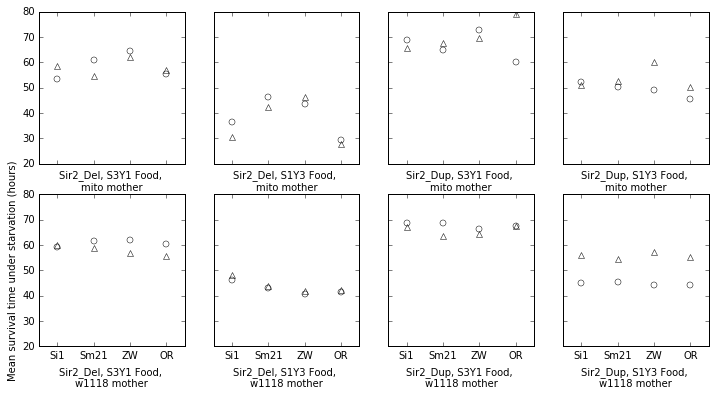

In [24]:
f, axes = plt.subplots(2, 4, figsize=(12,6), sharey=True, sharex=True)
transdict={'si1':'a','sm21':'b','zw':'c','or':'d'}
mean_df['mito1'] = mean_df.mito.map(transdict)
mean_df.sort('mito1',inplace=True)
axes    = axes.ravel()
for rep, marker in zip([1,2], ['o','^']):
    kwarg = {'ls':'', 'marker':marker, 'markerfacecolor':'none', 'markeredgecolor':'k'}
    mean_df.query("Sir2=='Del' & Food=='S' & Rep==%s & Mother=='mito'"%rep).set_index(['mito1']).Mean_LS.plot(ax=axes[0], 
                                                                                       **kwarg)
    mean_df.query("Sir2=='Del' & Food=='Y' & Rep==%s & Mother=='mito'"%rep).set_index(['mito1']).Mean_LS.plot(ax=axes[1], 
                                                                                       **kwarg)
    mean_df.query("Sir2=='Dup' & Food=='S' & Rep==%s & Mother=='mito'"%rep).set_index(['mito1']).Mean_LS.plot(ax=axes[2], 
                                                                                       **kwarg)
    mean_df.query("Sir2=='Dup' & Food=='Y' & Rep==%s & Mother=='mito'"%rep).set_index(['mito1']).Mean_LS.plot(ax=axes[3], 
                                                                                       **kwarg)
    mean_df.query("Sir2=='Del' & Food=='S' & Rep==%s & Mother=='w1118'"%rep).set_index(['mito1']).Mean_LS.plot(ax=axes[4], 
                                                                                       **kwarg)
    mean_df.query("Sir2=='Del' & Food=='Y' & Rep==%s & Mother=='w1118'"%rep).set_index(['mito1']).Mean_LS.plot(ax=axes[5], 
                                                                                       **kwarg)
    mean_df.query("Sir2=='Dup' & Food=='S' & Rep==%s & Mother=='w1118'"%rep).set_index(['mito1']).Mean_LS.plot(ax=axes[6], 
                                                                                       **kwarg)
    mean_df.query("Sir2=='Dup' & Food=='Y' & Rep==%s & Mother=='w1118'"%rep).set_index(['mito1']).Mean_LS.plot(ax=axes[7], 
                                                                                       **kwarg)
xlabel = zip(['Sir2_Del', 'Sir2_Del', 'Sir2_Dup', 'Sir2_Dup']*2,
             ['S3Y1 Food','S1Y3 Food']*4,
             ['\nmito mother']*4+['\nw1118 mother']*4)
xlabel = map(', '.join, xlabel)
for ax, xl in zip(axes, xlabel):
    ax.set_xlabel(xl)
    ax.set_xlim((-0.5, 3.5))
    ax.xaxis.set_ticks(range(4))
    ax.xaxis.set_ticklabels(['Si1','Sm21','ZW','OR'])

axes[4].set_ylabel('Mean survival time under starvation (hours)')

#for ax,  in zip    #ax.set_xlim((-1.5, 8))
# for ax in axes:
#     for item in ax.xaxis.get_ticklabels():
#         item.set_rotation(90)
#mean_df.plot()

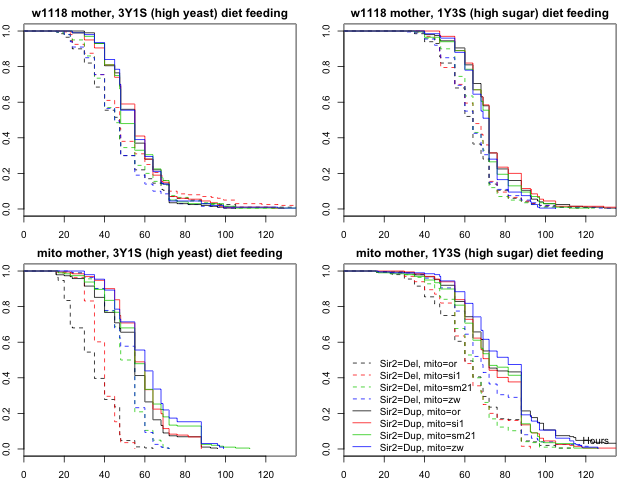

In [25]:
%%R -w 640 -h 480
library(survival)
setwd('/Users/user/Work/Sir2_figs')
df <- read.csv('Sir2_dup_del_stv_mito.csv')
S1 <- survfit(Surv(Time1)~Sir2+mito, conf.type="none", data=df[(df$Food=='Y')&(df$Mother=='w1118'),])
S2 <- survfit(Surv(Time1)~Sir2+mito, conf.type="none", data=df[(df$Food=='S')&(df$Mother=='w1118'),])
S3 <- survfit(Surv(Time1)~Sir2+mito, conf.type="none", data=df[(df$Food=='Y')&(df$Mother=='mito'),])
S4 <- survfit(Surv(Time1)~Sir2+mito, conf.type="none", data=df[(df$Food=='S')&(df$Mother=='mito'),])
par(mfrow=c(2,2))
par(mar=c(2,2,2,2))
CLS <- c(1,2,3,4)
LTY <- rep(c(2,1), each=4)
plot(S1, main="w1118 mother, 3Y1S (high yeast) diet feeding", 
     lty=LTY, lwd=1, col=CLS, xlim=c(0,135))
plot(S2, main="w1118 mother, 1Y3S (high sugar) diet feeding",
     lty=LTY, lwd=1, col=CLS, xlim=c(0,135))
plot(S3, main="mito mother, 3Y1S (high yeast) diet feeding", 
     lty=LTY, lwd=1, col=CLS, xlim=c(0,135))
plot(S4, main="mito mother, 1Y3S (high sugar) diet feeding",
     lty=LTY, lwd=1, col=CLS, xlim=c(0,135))
text(125, 0.05, 'Hours')
legend(0, 0.55, names(S1$strata), 
       bty='n', 
       lty=LTY, lwd=1, col=CLS)
# mdl <- coxph(Surv(time)~Food*Genotype*Sex, data=df)
# S <- summary(mdl)
# C <- printCoefmat(S$coefficient, digits=3)

In [26]:
%%R
library(survival)
library(coxme)
setwd('/Users/user/Work/Sir2_figs')
df <- read.csv('Sir2_dup_del_stv_mito.csv')
m1 <- coxme(Surv(Time1)~(1|mito)+Sir2+Food, data=droplevels(df[df$Mother=='w1118',]))
m2 <- coxme(Surv(Time1)~(1|mito)+Sir2+Food, data=droplevels(df[df$Mother=='mito',]))
m3 <- coxme(Surv(Time1)~(1|mito)+Sir2, data=droplevels(df[(df$Mother=='mito')&(df$Food=='Y'),]))
m4 <- coxme(Surv(Time1)~(1|mito)+Sir2, data=droplevels(df[(df$Mother=='mito')&(df$Food=='S'),]))
m5 <- coxme(Surv(Time1)~(1|mito)+Food, data=droplevels(df[(df$Mother=='mito')&(df$Sir2=='Del'),]))
m6 <- coxme(Surv(Time1)~(1|mito)+Food, data=droplevels(df[(df$Mother=='mito')&(df$Sir2=='Dup'),]))
c1 <- coxph(Surv(Time1)~Sir2+Food, data=droplevels(df[df$Mother=='w1118',]))
c2 <- coxph(Surv(Time1)~Sir2+Food, data=droplevels(df[df$Mother=='mito',]))
c3 <- coxph(Surv(Time1)~Sir2, data=droplevels(df[(df$Mother=='mito')&(df$Food=='Y'),]))
c4 <- coxph(Surv(Time1)~Sir2, data=droplevels(df[(df$Mother=='mito')&(df$Food=='S'),]))
c5 <- coxph(Surv(Time1)~Food, data=droplevels(df[(df$Mother=='mito')&(df$Sir2=='Del'),]))
c6 <- coxph(Surv(Time1)~Food, data=droplevels(df[(df$Mother=='mito')&(df$Sir2=='Dup'),]))
condition <- c('w1118 mother','mito mother','mito mother, 3Y1S food',
               'mito mother, 1Y3S food', 'mito mother, Sir2 Del','mito mother, Sir2 Dup')
result <- cbind(condition,
          rbind(m1$vcoef, m2$vcoef, m3$vcoef, m4$vcoef, m5$vcoef, m6$vcoef), 
          rbind(anova(c1, m1), anova(c2, m2), anova(c3, m3), anova(c4, m4), 
                anova(c5, m5), anova(c6, m6))[c(2,4,6,8,10,12),])

In [27]:
coxme_df = com.convert_robj(robjects.globalenv.get('result'))
coxme_df['Mito Variance'] = coxme_df.mito.map(lambda x: x[0])
coxme_df = coxme_df[['condition', 'Mito Variance', 'Chisq', 'Df', 'P(>|Chi|)']]
coxme_df.set_index('condition', inplace=True)
coxme_df[' '] = map(prob_to_code, coxme_df['P(>|Chi|)'])
table_list.append(coxme_df.to_html())
coxme_df

,Mito Variance,Chisq,Df,P(>|Chi|),
condition,,,,,
w1118 mother,5.52e-03,8.31,1,3.95e-03,**
mito mother,5.39e-02,110.69,1,0.00e+00,***
"mito mother, 3Y1S food",2.02e-01,181.73,1,0.00e+00,***
"mito mother, 1Y3S food",2.50e-02,22.64,1,1.95e-06,***
"mito mother, Sir2 Del",1.87e-01,174.17,1,0.00e+00,***
"mito mother, Sir2 Dup",1.00e-02,7.18,1,7.39e-03,**


In [28]:
style = '''<style type="text/css">
table.dataframe {
    border-collapse: collapse;
}
table.dataframe td,
table.dataframe th {
    border: 1px, solid black;
    padding: 2px;
}
</style>'''

In [29]:
all_tables = '<h1>Table %s</h1>'.join([style]+table_list)%(1,2,3,4,5,6)

In [30]:
with open('All_tables.html', 'w') as f:
    f.write(all_tables.replace('NaN', ''))